# Simple Regression

[Linear regression]() is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [122]:
df = pd.read_csv("./SalaryData.csv")

In [123]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [124]:
df.shape

(30, 2)

In [125]:
df.isnull().values.any()

False

## Split data

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

In [126]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [127]:
df_copy = train_set.copy()

In [128]:
df_copy.shape

(24, 2)

In [129]:
df_copy.head()

,YearsExperience,Salary
28,10.3,122391.0
24,8.7,109431.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0


## Exploratory Data Analysis

In [130]:
df_copy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [132]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


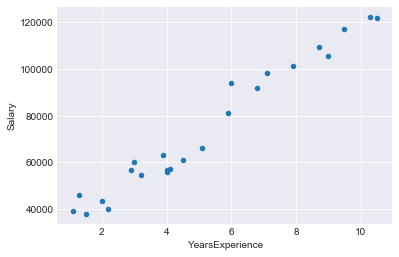

In [131]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

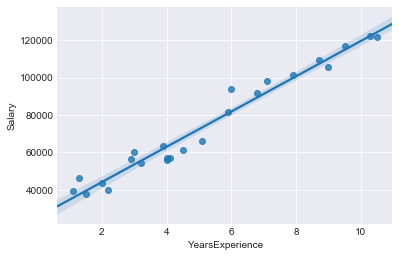

In [133]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

## Predict

In [134]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [135]:
test_set.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [136]:
train_labels = df_copy["Salary"]

In [137]:
train_labels.head()

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

In [138]:
train_set_full = train_set.copy()

train_set = train_set.drop(["Salary"], axis=1)

In [139]:
train_set.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [140]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

salary_pred = lin_reg.predict(test_set)

## Analyze Results

In [142]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [ 9423.81532303]
Intercept:  25321.5830118


In [141]:
print(salary_pred)
print(test_set_full["Salary"])

[ 115790.21011287   71498.27809463  102596.86866063   75267.80422384
   55477.79204548   60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [143]:
lin_reg.score(train_set, train_labels)

0.96454015734181464

In [144]:
from sklearn.metrics import r2_score

r2_score(test_set_full["Salary"], salary_pred)

0.90244617741804967

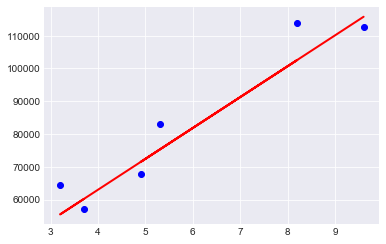

In [120]:
sns.set_style("darkgrid")

plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"],  color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)